**lBORATORIO 2 ML2**

## Algorítmo de agrupamiento DBSCAN

DBSCAN significa agrupamiento espacial de aplicaciones con ruido basado en la densidad . Es capaz de encontrar grupos de forma arbitraria y grupos con ruido (es decir, valores atípicos).

La idea principal detrás de DBSCAN es que un punto pertenece a un grupo si está cerca de muchos puntos de ese grupo.

Hay dos parámetros clave deDBSCAN:

eps : La distancia que especifica los vecindarios. Se considera que dos puntos son vecinos si la distancia entre ellos es menor o igual a eps.
minPts: Número mínimo de puntos de datos para definir un clúster.
Con base en estos dos parámetros, los puntos se clasifican como punto central, punto límite o valor atípico:



*   Punto central: un punto es un punto central si hay al menos minPts número de puntos (incluido el punto en sí) en su área circundante con radio eps.

*   Punto fronterizo: un punto es un punto fronterizo si es accesible desde un punto central y hay menos de minPts número de puntos dentro de su área circundante

*  Valor atípico: un punto es un valor atípico si no es un punto central y no se puede alcanzar desde ningún punto central. 

La distancia entre puntos se determina usando un método de medición de distancia como en el algoritmo k-means. El método más utilizado es la distancia euclidiana, de ésta manera, el algoritmo DBSCAN puede encontrar regiones de alta densidad y separarlas de las regiones de baja densidad.

Un clúster incluye puntos centrales que son vecinos (es decir, accesibles entre sí) y todos los puntos fronterizos de estos puntos centrales. La condición requerida para formar un clúster es tener al menos un punto central. Aunque es muy poco probable, es posible que tengamos un grupo con un solo punto central y sus puntos fronterizos.








### Implementación de Scikit-learn

Comenzamos con la creación de un conjunto de datos de muestra utilizando el módulo de conjuntos de datos de scikit-learn. Después de crear los puntos de datos de muestra, normalizaremos los valores usando la clase StandardScaler del módulo de preprocesamiento de scikit-learn.

Nota : es importante normalizar los valores porque facilita encontrar una distancia adecuada para el radio de vecindad.

Primero importamos las bibliotecas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline


Crearemos un conjunto de datos con 3 grupos con una desviación estándar de 0,5 para cada grupo. El número de muestras es 400 y también elegimos tres puntos como centroides (centro de grupos). Puede ajustar estos parámetros como quiera usando la función make_blobs.

In [ ]:
#Determine centroides
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Crear dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize los valores
X = StandardScaler().fit_transform(X)

In [ ]:
#Como se veria cada conjunto de datos
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [ ]:
# Ahora podemos crear un objeto DBSCAN y ajustar los datos:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters determinados por DBSCAN')

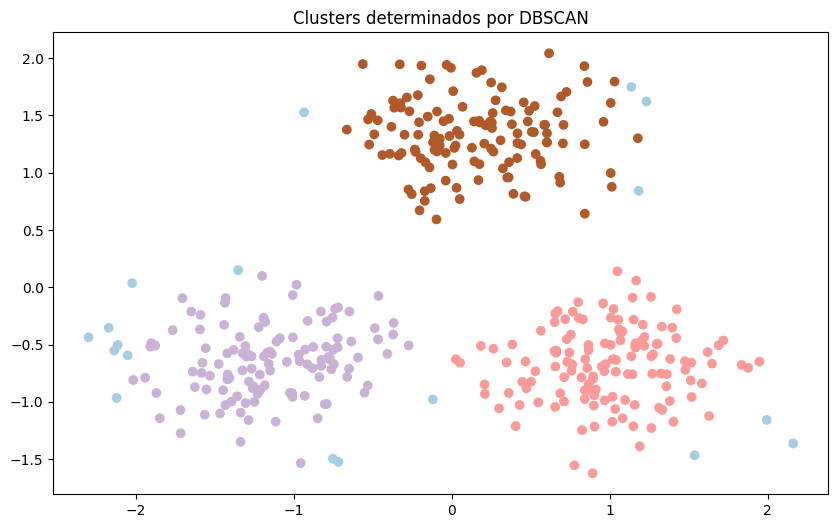

In [ ]:
# Solo necesitamos definir los valores eps y minPts usando los parámetros eps y min_samples .

# Nota : No tenemos que especificar el número de grupos para DBSCAN, lo cual es una gran ventaja de DBSCAN sobre el agrupamiento de k-means.

y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6)) 
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired') 
plt.title("Clusters determinados por DBSCAN" )

In [ ]:
# Podemos acceder a las etiquetas de los puntos de datos usando el atributo label_.
# El ruido (o los valores atípicos) reciben la etiqueta -1. Vamos a comprobar el número de valores atípicos:

db.labels_[db.labels_ == -1].size

18

### Pros y contras de DBSCAN

PROS 

*   No requiere especificar el número de clústeres de antemano.
*   Funciona bien con grupos de formas arbitrarias.
*   DBSCAN es resistente a los valores atípicos y puede detectar los valores atípicos.

CONTRAS

*   En algunos casos, determinar una distancia adecuada de vecindad (eps) no es fácil y requiere conocimiento del dominio.

*   Si los clústeres son muy diferentes en términos de densidades dentro del clúster, DBSCAN no es adecuado para definir clústeres. Las características de los conglomerados se definen mediante la combinación de parámetros eps-minPts. Dado que pasamos una combinación eps-minPts al algoritmo, no se puede generalizar bien a grupos con densidades muy diferentes.





La agrupación en clústeres de K-means es uno de los algoritmos de aprendizaje automático no supervisado más simples y populares.

Por lo general, los algoritmos no supervisados ​​hacen inferencias a partir de conjuntos de datos utilizando solo vectores de entrada sin referirse a resultados conocidos o etiquetados.

## K-means algorithm

El agrupamiento de K-means es una técnica ampliamente utilizada para el análisis de conglomerados de datos.

Es fácil de entender, especialmente si acelera su aprendizaje usando un tutorial de agrupamiento de K-means . Además, ofrece resultados de entrenamiento rápidamente.

### Generar datos aleatorios en un espacio bidimensional

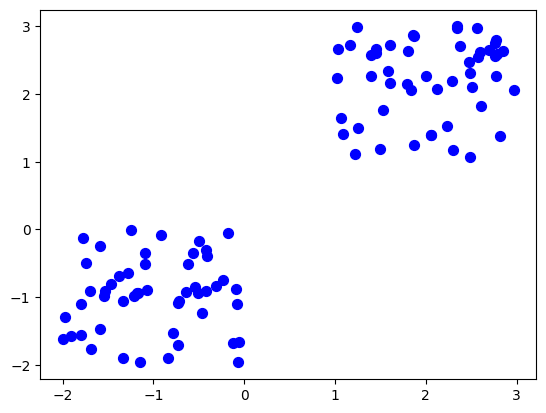

In [ ]:
from sklearn.cluster import KMeans

# Generando datos aleatorios
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)

# Se han generado un total de 100 puntos de datos 
# y se han dividido en dos grupos, de 50 puntos cada uno.
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [ ]:
# Procesando datos aleatoriamente con 2 cluster

Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
Kmean.cluster_centers_

array([[ 2.02444223,  2.21356751],
       [-0.99120997, -0.97016281]])

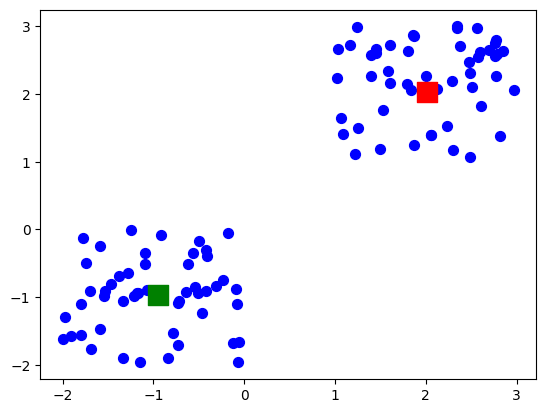

In [ ]:
# Vamos a mostrar los centroides del clúster (usando el color verde y rojo).

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

### probando el algorítmo

In [ ]:
# cómo se clasifican los puntos de datos en los dos grupos.

Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Como puede ver arriba, 50 puntos de datos pertenecen al grupo 0 mientras que el resto pertenece al grupo 1 .

Por ejemplo, usaremos el siguiente código para predecir el grupo de un punto de datos:

In [ ]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1], dtype=int32)

## Algoritmo de agrupamiento de K-Medoid 

El algoritmo k-medoids es una variante del algoritmo k-means que utiliza objetos representativos (medoids) en lugar de la media de cada cluster para minimizar la función objetivo. A continuación se muestra un ejemplo de cómo implementar el algoritmo k-medoids en Python utilizando la biblioteca Scikit-learn:

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import numpy as np

# Generar datos sintéticos
X, y = make_blobs(
    n_samples=500, 
    n_features = 2,
    centers=4, 
    cluster_std = 1,
    center_box = (-10.0,10.0),
    shuffle = True,
    random_state=42)

# Inicializar el algoritmo k-medoids
def kmedoids(D, k, tmax=100):
    m, n = D.shape

    # Aleatoriamente elegir k objetos representativos
    idx = np.random.choice(n, k, replace=False)
    medoids = D[:, idx]

    # Asignar objetos al medoid más cercano
    J = np.argmin(pairwise_distances(D, medoids), axis=1)

    # Inicializar el costo y la asignación
    Jprev = np.inf
    for t in range(tmax):
        for i in range(k):
            # Calcular el costo de intercambiar el i-ésimo medoid
            Jnew = np.sum(D[J==i][:, J==i]) - np.sum(D[np.newaxis, idx!=i], axis=1)[J==i]
            if Jnew < Jprev:
                Jprev = Jnew
                idx[i] = np.argmin(np.sum(D[:, J==i], axis=1))
                medoids[:, i] = D[:, idx[i]]
                J = np.argmin(pairwise_distances(D, medoids), axis=1)
            else:
                break
    return medoids, Jprev, J

# Calcular la matriz de distancias
D = pairwise_distances(X)

# Correr el algoritmo k-medoids
medoids, Jprev, J = kmedoids(D, k=3)

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=J)
plt.scatter(medoids[0], medoids[1], c='r', s=100, marker='x')
plt.show()


Diferentes tipos de dispersion de datos

In [ ]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

import matplotlib.pyplot as plt

plt.scatter(medoids[0], medoids[1], c='r', s=100, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos sintéticos
np.random.seed(42)
X = np.random.randn(100, 2)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset')
plt.show()
